In [60]:
'''
LSTM for sequence replication
'''

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

print('done')

done


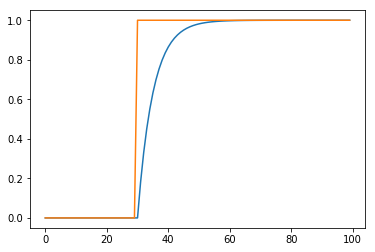

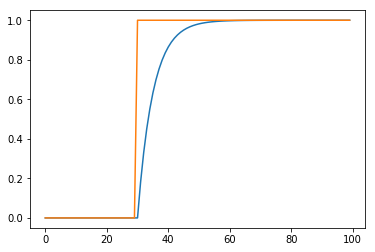

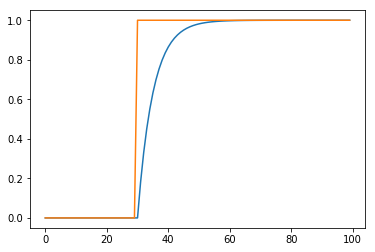

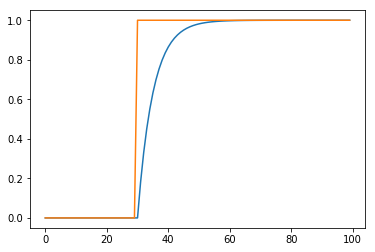

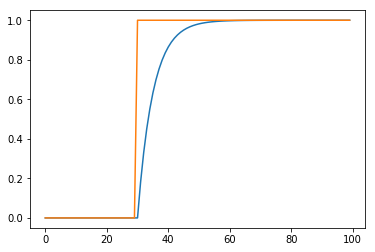

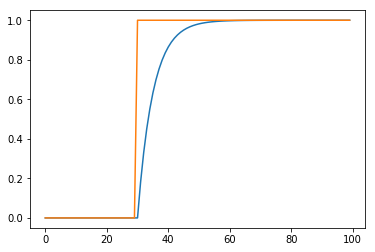

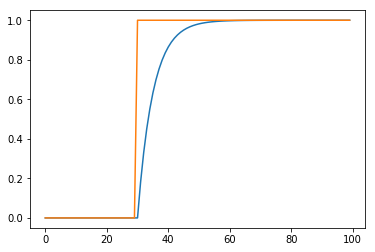

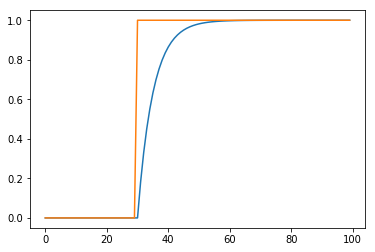

In [71]:
fig=plt.gcf()
fig.canvas.draw()

x=np.array([i for i in range(0,100)])
data = np.zeros((1,100, 1))
data[0,30:,0]=1.0
target= np.zeros((1,100,1))
for i in range(100):
    target[0,i,0] = data[0,i,0]*((1-np.exp(-(i-30)/5.0)))

for t in range(8):
    plt.gcf().clear()

    #plt.plot(data[0,0,:])
    plt.plot(target[0,:100,0])
    plt.plot(data[0,:100,0])
    fig.canvas.draw()
    plt.pause(0.001)



In [74]:

x_test = np.zeros((1,100,1))
x_test[0,30:,0]=1.0
y_test = np.zeros((1,100,1))
for i in range(100):
    y_test[0,i,0] = x_test[0,i,0]*((1-np.exp(-(i-50)/5.0)))



model = Sequential()  
model.add(LSTM(6, return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(6,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop',metrics=['accuracy'])
'''
try:
    model.load_weights("lstm.model")
    print('weights loaded ')
except:
    print('weights not loaded ')
'''

'\ntry:\n    model.load_weights("lstm.model")\n    print(\'weights loaded \')\nexcept:\n    print(\'weights not loaded \')\n'

In [78]:
for i in range(10):

    model.fit(data, target, nb_epoch=10, batch_size=1, verbose=2,validation_data=(x_test, y_test))
    predict = model.predict(x_test)
    plt.gcf().clear()
    predict = model.predict(data)
    plt.plot(x,predict[0,0,:])
    plt.plot(x,target[0,:])
    fig.canvas.draw()
    plt.pause(0.01)
    #plt.show()
print('done')

ValueError: Error when checking target: expected dense_12 to have 2 dimensions, but got array with shape (1, 100, 1)

In [ ]:
def check_predict(inp,exp_out):
    inp=inp.reshape((1,1,100))
    exp_out=exp_out.reshape((1,1,100))
    predict = model.predict(inp)
    plt.gcf().clear()
    plt.plot(x,predict[0,0,:])
    plt.plot(x,inp[0,0,:])
    plt.plot(x,exp_out[0,0,:])
    plt.pause(0.1)

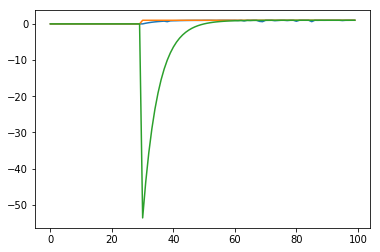

In [50]:
check_predict(x_test,y_test)

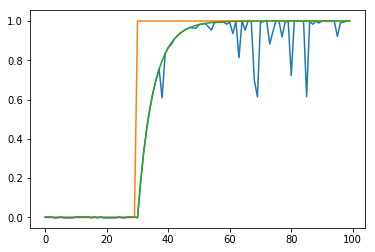

In [51]:
check_predict(data[0,:,:],target[0,:,:])

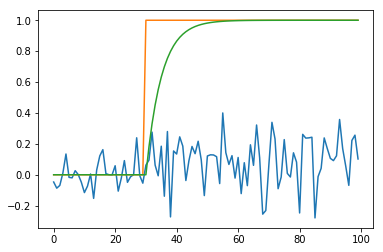

In [45]:
check_predict(data[0,:,:],target[0,:,:])

In [53]:
model.save_weights("lstm.model")
print('weights saved')

weights saved


In [55]:
x_test = np.zeros((1, 1, 100))
x_test[0,0,81:]=1.0
y_test = np.zeros((1, 1, 100))
for i in range(100):
    y_test[0,0,i] = x_test[0,0,i]*((1-np.exp(-(i-81)/5.0)))

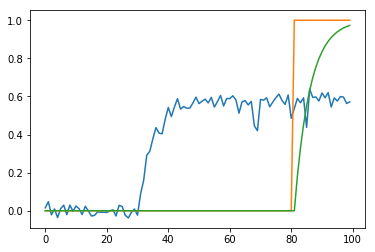

In [56]:
check_predict(x_test,y_test)

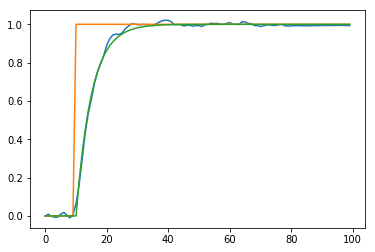

In [40]:
check_predict(data[10,:,:],target[10,:,:])